<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Что такое Colaboratory?</h1>

Colaboratory, или просто Colab, позволяет писать и выполнять код Python в браузере. При этом:
- не требуется никакой настройки;
- вы получаете бесплатный доступ к графическим процессорам;
- предоставлять доступ к документам другим людям очень просто.

Это отличное решение для <strong>студентов</strong>, <strong>специалистов по обработке данных</strong> и <strong>исследователей в области искусственного интеллекта</strong>. Чтобы узнать больше, посмотрите <a href="https://www.youtube.com/watch?v=inN8seMm7UI">ознакомительное видео</a> или начните работу с инструментом ниже.

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error

from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/toyota.csv', delimiter=';')
print(data.columns)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')


In [ ]:
data.shape

(6738, 9)

In [ ]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [ ]:
unique_values_data = pd.DataFrame(data.select_dtypes(include=['object']).copy().apply(pd.unique))
unique_values_data

,0
model,"[ GT86, Corolla, RAV4, Yaris, Auris, Aygo..."
transmission,"[Manual, Automatic, Semi-Auto, Other]"
fuelType,"[Petrol, Other, Hybrid, Diesel]"


In [ ]:
dropedna_data = data.dropna()
dropedna_data = dropedna_data.apply(lambda x:  pd.to_numeric(x, errors = 'ignore'))

In [ ]:
def _color_red_or_green(val):
    color = 'red' if abs(val) < 0.25 else 'green'
    return 'color: %s' % color

In [ ]:
dropedna_data.corr().style.applymap(_color_red_or_green)

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.420959,-0.727749,0.283455,-0.020607,-0.045567
price,0.420959,1.000000,-0.297936,0.214498,-0.039910,0.727592
mileage,-0.727749,-0.297936,1.000000,-0.205285,0.044889,0.182615
tax,0.283455,0.214498,-0.205285,1.000000,-0.430292,0.155727
mpg,-0.020607,-0.039910,0.044889,-0.430292,1.000000,-0.106868
engineSize,-0.045567,0.727592,0.182615,0.155727,-0.106868,1.000000


In [ ]:
data = data.drop(['tax', 'mpg'], axis = 1)
data.shape

(6738, 7)

In [ ]:
category_data = data.select_dtypes(include=['object']).copy()
data = data.drop(list(category_data.columns), axis = 1)
category_data.head()

,model,transmission,fuelType
0,GT86,Manual,Petrol
1,GT86,Manual,Petrol
2,GT86,Manual,Petrol
3,GT86,Manual,Petrol
4,GT86,Manual,Petrol


In [ ]:
category_data = pd.get_dummies(category_data, columns = ['model', 'transmission', 'fuelType'])
category_data.head()

,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,model_ Camry,model_ Corolla,model_ GT86,model_ Hilux,model_ IQ,model_ Land Cruiser,...,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
category_data.shape

(6738, 26)

In [ ]:
data = pd.concat([category_data, data], axis = 1)
data.shape

(6738, 30)

In [ ]:
X = data.drop(['price'], axis = 1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
params = {'max_depth':range(9,15),'min_samples_split':range(19,23), 'min_samples_leaf': range(1,5)}
regressor = tree.DecisionTreeRegressor()
grid_search_cv = GridSearchCV(regressor, params, cv = 5)
grid_search_cv.fit(X_train, y_train)
model1 = grid_search_cv.best_estimator_

In [ ]:
print(grid_search_cv.best_params_)
y_pred = model1.predict(X_test)
result=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
result.head()

{'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 20}


,Actual,Predicted
381,37440,35105.714286
2476,4159,5030.705882
2855,10600,11843.571429
2018,8995,11990.000000
2185,11000,9449.461538


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f18cd9190>,
      dtype=object)

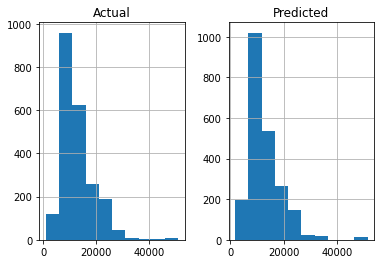

In [ ]:
result.hist()

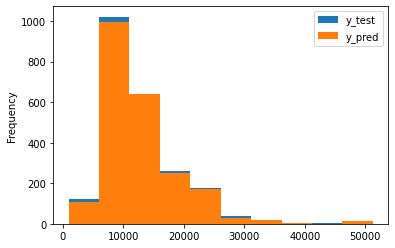

In [ ]:
pd.DataFrame({'num':range(len(y_test)),'y_test':y_test, 'y_pred':y_pred}).plot(y = ['y_test','y_pred'], x = 'num', kind='hist');

In [ ]:
print('Значение R^2 = ', model1.score(X_test,y_test))
print('Значение R^2 = ', model1.score(X_train,y_train))

Значение R^2 =  0.9493137199709576
Значение R^2 =  0.9681725700601493


In [ ]:
y_pred_train = model1.predict(X_train)
y_pred = model1.predict(X_test)
print('MAPE Test for train = ', np.mean(abs((y_pred_train-y_train)/y_pred_train)))
print('MAPE Test for test= ', np.mean(abs((y_pred-y_test)/y_test)))

MAPE Test for train =  0.06455740792544366
MAPE Test for test=  0.0832977049014774


In [ ]:
params = {'n_estimators':[10],'max_depth':range(9,15),'min_samples_split':range(19,23), 'min_samples_leaf': range(1,5)}
regressor = RandomForestRegressor()
grid_search_cv = GridSearchCV(regressor, params, cv = 5)
grid_search_cv.fit(X_train, y_train)
model2 = grid_search_cv.best_estimator_
y_pred = model2.predict(X_test)
result=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
result.head()

,Actual,Predicted
381,37440,33881.967767
2476,4159,4662.776042
2855,10600,11797.956940
2018,8995,10509.701618
2185,11000,9383.490515


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f18731c90>,
      dtype=object)

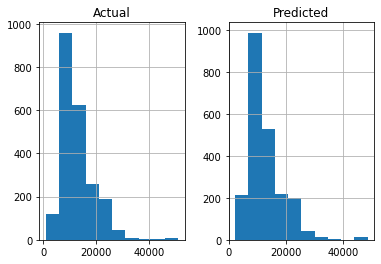

In [ ]:
result.hist()

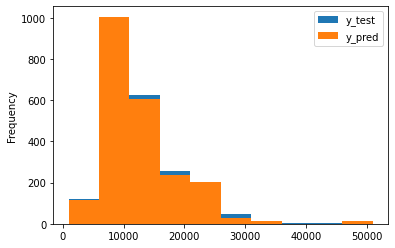

In [ ]:
pd.DataFrame({'num':range(len(y_test)),'y_test':y_test, 'y_pred':y_pred}).plot(y = ['y_test','y_pred'], x = 'num', kind='hist');

In [ ]:
print('Значение R^2 = ', model2.score(X_test,y_test))
print('Значение R^2 = ', model2.score(X_train,y_train))

Значение R^2 =  0.9564742065783884
Значение R^2 =  0.967670078007091


In [ ]:
y_pred_train = model2.predict(X_train)
y_pred = model2.predict(X_test)
print('MAPE Test for train = ', np.mean(abs((y_pred_train-y_train)/y_pred_train)))
print('MAPE Test for test= ', np.mean(abs((y_pred-y_test)/y_test)))

MAPE Test for train =  0.062336055193899724
MAPE Test for test=  0.07961812347459075


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
data = pd.read_csv('/content/drive/MyDrive/toyota.csv', delimiter=';')
category_data = data.select_dtypes(include=['object']).copy()
model_data =category_data.drop(['fuelType'], axis = 1)
model_data = model_data.drop(['transmission'], axis = 1)
data = data.drop(list(category_data.columns), axis = 1)
category_data=category_data.drop(['model'], axis = 1)
category_data = pd.get_dummies(category_data, columns = ['transmission', 'fuelType'])
model_data = pd.get_dummies(model_data, columns = ['model'])
data = pd.concat([category_data, data], axis = 1)
X = data.drop(['price'], axis = 1)
y = data['price'] 
X.head()

,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,year,mileage,tax,mpg,engineSize
0,0,1,0,0,0,0,0,1,2016,24089,265,36.2,2.0
1,0,1,0,0,0,0,0,1,2017,18615,145,36.2,2.0
2,0,1,0,0,0,0,0,1,2015,27469,265,36.2,2.0
3,0,1,0,0,0,0,0,1,2017,14736,150,36.2,2.0
4,0,1,0,0,0,0,0,1,2017,36284,145,36.2,2.0


In [ ]:
clf = ExtraTreesClassifier(n_estimators=30)
clf.fit(X, y)
clf.feature_importances_
model = SelectFromModel(clf, threshold = 0.00078, prefit=True)
X_new = model.transform(X)
pd.DataFrame(X_new).head()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,0,1,2,3,4,5,6,7
0,0.0,1.0,1.0,2016.0,24089.0,265.0,36.2,2.0
1,0.0,1.0,1.0,2017.0,18615.0,145.0,36.2,2.0
2,0.0,1.0,1.0,2015.0,27469.0,265.0,36.2,2.0
3,0.0,1.0,1.0,2017.0,14736.0,150.0,36.2,2.0
4,0.0,1.0,1.0,2017.0,36284.0,145.0,36.2,2.0


In [ ]:
X = pd.concat([model_data, pd.DataFrame(X_new)], axis = 1)
X.head()

,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,model_ Camry,model_ Corolla,model_ GT86,model_ Hilux,model_ IQ,model_ Land Cruiser,...,model_ Verso-S,model_ Yaris,0,1,2,3,4,5,6,7
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0.0,1.0,1.0,2016.0,24089.0,265.0,36.2,2.0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0.0,1.0,1.0,2017.0,18615.0,145.0,36.2,2.0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0.0,1.0,1.0,2015.0,27469.0,265.0,36.2,2.0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0.0,1.0,1.0,2017.0,14736.0,150.0,36.2,2.0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0.0,1.0,1.0,2017.0,36284.0,145.0,36.2,2.0


In [ ]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
params = {'max_depth':range(9,15),'min_samples_split':range(19,23), 'min_samples_leaf': range(1,5)}
regressor = tree.DecisionTreeRegressor()
grid_search_cv = GridSearchCV(regressor, params, cv = 5)
grid_search_cv.fit(X_train, y_train)
model1 = grid_search_cv.best_estimator_
print(grid_search_cv.best_params_)
y_pred = model1.predict(X_test)
result=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
result.head()

{'max_depth': 14, 'min_samples_leaf': 2, 'min_samples_split': 21}


,Actual,Predicted
381,37440,33586.950000
2476,4159,5082.000000
2855,10600,11281.923077
2018,8995,10417.000000
2185,11000,9853.800000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f1843d390>,
      dtype=object)

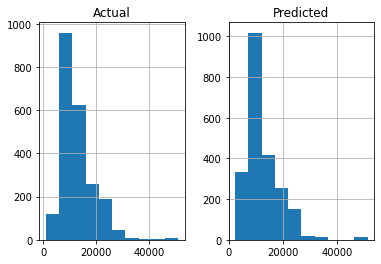

In [ ]:
result.hist()

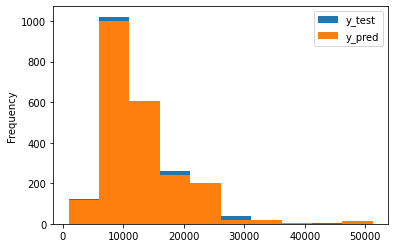

In [ ]:
pd.DataFrame({'num':range(len(y_test)),'y_test':y_test, 'y_pred':y_pred}).plot(y = ['y_test','y_pred'], x = 'num', kind='hist');

In [ ]:
print('Значение R^2 = ', model1.score(X_test,y_test))
print('Значение R^2 = ', model1.score(X_train,y_train))

Значение R^2 =  0.9549340422983807
Значение R^2 =  0.9719311948466011


In [ ]:
y_pred_train = model1.predict(X_train)
y_pred = model1.predict(X_test)
print('MAPE Test for train = ', np.mean(abs((y_pred_train-y_train)/y_pred_train)))
print('MAPE Test for test= ', np.mean(abs((y_pred-y_test)/y_test)))

MAPE Test for train =  0.057966079871266715
MAPE Test for test=  0.07707463381656038


In [ ]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
params = {'n_estimators':[10],'max_depth':range(9,15),'min_samples_split':range(19,23), 'min_samples_leaf': range(1,5)}
regressor = RandomForestRegressor()
grid_search_cv = GridSearchCV(regressor, params, cv = 5)
grid_search_cv.fit(X_train, y_train)
model2 = grid_search_cv.best_estimator_
y_pred = model2.predict(X_test)
result=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
result.head()

,Actual,Predicted
381,37440,33708.454643
2476,4159,4584.363865
2855,10600,11391.048535
2018,8995,10034.168630
2185,11000,9716.585075


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f184b7810>,
      dtype=object)

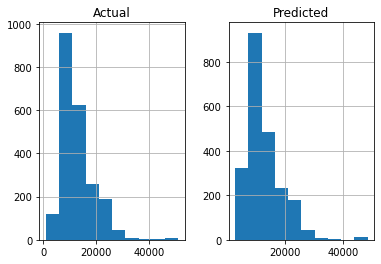

In [ ]:
result.hist()

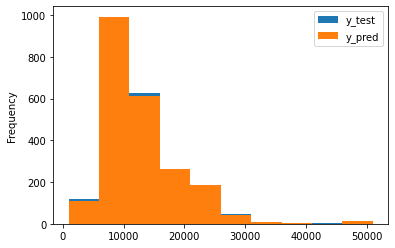

In [ ]:
pd.DataFrame({'num':range(len(y_test)),'y_test':y_test, 'y_pred':y_pred}).plot(y = ['y_test','y_pred'], x = 'num', kind='hist');

In [ ]:
print('Значение R^2 = ', model2.score(X_test,y_test))
print('Значение R^2 = ', model2.score(X_train,y_train))

Значение R^2 =  0.9606967261651581
Значение R^2 =  0.9678098230390488


In [ ]:
y_pred_train = model2.predict(X_train)
y_pred = model2.predict(X_test)
print('MAPE Test for train = ', np.mean(abs((y_pred_train-y_train)/y_pred_train)))
print('MAPE Test for test= ', np.mean(abs((y_pred-y_test)/y_test)))

MAPE Test for train =  0.05817115075287661
MAPE Test for test=  0.07441760857127545
